## <center> Decision Trees </center>

They are used for supervised learning for both classification and regression tasks.

* https://scikit-learn.org/stable/modules/tree.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Install Graphviz module
```
sudo pip3 install graphviz
sudo yum install graphviz
```

Feature importances: [0. 1.]


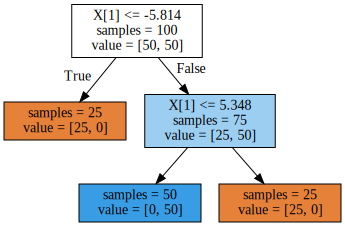

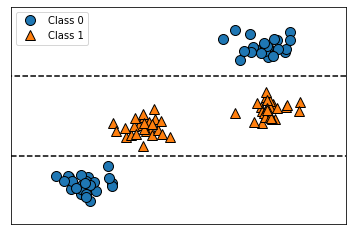

In [12]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

mglearn.plots.plot_tree_not_monotone()

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

#### Create and test the model :
1. Split the data.
2. Instanciate the Decision Tree Classifier with the default parameters.

In [1]:
from sklearn.model_selection import train_test_split

# Fill Here

#### Let's evaluate the algorithm :

In [4]:
# Fill Here

**Warning :**
Accuracy of 1.00 means that all the leaves are pure. So the branching of the tree went 
all the way down until the algorithm could memorize and fit all the labels.
This is overfitting. It happens because the decision tree was unrestricted 
and went all the way down through the branching until it fit perfectly fit the training data.

To avoid overfitting we apply restrictions to limit the depth of the decision tree which 
in tun is going to limit its complexity.

Pruning technique :

There are two types of pruning, pre and post.
- With pre-pruning we stop the creation of the tree at an earlier stage. 
So we can limit :
1. the depth of the tree.
2. the maximum number of leaves.
3. specify a minimum of points for a node so that it can keep splitting.
By limiting the depth of the tree we limit the number of questions that can be asked.

- With post-pruning, once the tree is created, we can remove irrelevant branches or nodes that 
contain little information.

#### Let's try to improve the accuracy with fine tuning (max_depth) :

In [5]:
# Fill here

# It should increases the accuracy over the test data.

#### Evaluate the algorithm :

In [1]:
# Fill here

In [6]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names,
               impurity=False, filled=True)

### Transform the .dot to .png
```
dot -Tpng cancertree.dot -o cancertree.png
```
We have the tumor radius at the top of the tree, this leads us into thinking about the important of this feature.

![](cancertree.png)

![](cancertree_all.png)

We can use a property of the decision tree qhich is called feature importances. 
It will show us how much weight each feature carries for decision making. So each feature 
i attributed zero and one. 0 meaning that the feature is not used for the decision process
while one meaning the it perfectly predcts the target.

In [ ]:
print("Feature importances: {}".format(tree.feature_importances_))

In [ ]:
print(cancer.feature_names)

#### A better way to do it :
We can see that the most important feature is worst radius, which is, as we've seen before at the top of the tree.

In [ ]:
import numpy as np

n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Advantages of Decision Trees

 - Easy to view and understand.
 - Unlike other machine learning classification algorithms there is no need to pre-process, normalize, scale, and/or standardize features.
 
### Paramaters to work with
 
 - max_depth,
 - min_samples_leaf, max_samples_leaf,
 - max_leaf_nodes,
 - etc.
 
### Main Disadvantages

- Tendency to overfit, even if we create prune tree.
- Poor generalization.

##### => Possible work-around: many machine learning parittioners use ensembles of decision trees